<a href="https://colab.research.google.com/github/legobitna/DeepLearning-basic/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi team, here is the exact format of the Tensorflow Certificate Test from Google. 

Remember to get at least > 98% for validation set to pass the test!

In [ ]:
# Computer Vision with CNNs
#
# Build a classifier for Rock-Paper-Scissors based on the rock_paper_scissors
# TensorFlow dataset.
#
# IMPORTANT: Your final layer should be as shown. Do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.
import urllib.request
import zipfile
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import zipfile
import os
import pathlib
import random
import shutil

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [ ]:
os.mkdir('tmp/rps/train')
os.mkdir('tmp/rps/test')
os.mkdir('tmp/rps/train/paper')
os.mkdir('tmp/rps/train/rock')
os.mkdir('tmp/rps/train/scissor')
os.mkdir('tmp/rps/test/paper')
os.mkdir('tmp/rps/test/rock')
os.mkdir('tmp/rps/test/scissor')

In [ ]:
DATA_RAW_FOLDER ='tmp/rps/'
DATA_TRAIN_FOLDER ='tmp/rps/train'
DATA_TEST_FOLDER ='tmp/rps/test'

In [ ]:
paper = pathlib.Path(os.path.join(DATA_RAW_FOLDER, 'paper'))
rock = pathlib.Path(os.path.join(DATA_RAW_FOLDER, 'rock'))
scissors = pathlib.Path(os.path.join(DATA_RAW_FOLDER, 'scissors'))

In [ ]:
paper_images, rock_images, scissors_images = [], [], []

for item in paper.glob('*'):
  paper_images.append(item)
for item in rock.glob('*'):
  rock_images.append(item)
for item in scissors.glob('*'):
  scissors_images.append(item)

In [ ]:
n_samples = 840
test_size = 0.2
sample_paper = random.sample(paper_images, n_samples)
sample_rock = random.sample(rock_images, n_samples)
sample_scissors = random.sample(scissors_images, n_samples)

assert len(sample_paper) + len(sample_rock)  + len (sample_scissors)== 840*3

In [ ]:
for i in range(n_samples):
  if i < (n_samples*test_size):
    shutil.copy(sample_paper[i], os.path.join(DATA_TEST_FOLDER, 'paper'))
    shutil.copy(sample_rock[i], os.path.join(DATA_TEST_FOLDER, 'rock'))
    shutil.copy(sample_scissors[i], os.path.join(DATA_TEST_FOLDER, 'scissor'))
  else:
    shutil.copy(sample_paper[i], os.path.join(DATA_TRAIN_FOLDER, 'paper'))
    shutil.copy(sample_rock[i], os.path.join(DATA_TRAIN_FOLDER, 'rock'))
    shutil.copy(sample_scissors[i], os.path.join(DATA_TRAIN_FOLDER, 'scissor'))

In [ ]:
TRAINING_DIR = "tmp/rps/train"
VALID_DIR = "tmp/rps/test"
IMG_WIDTH, IMG_HEIGHT = 224, 224

training_datagen = ImageDataGenerator(rescale= 1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                        TRAINING_DIR,
                        target_size=(IMG_WIDTH, IMG_HEIGHT), 
                        batch_size=32,
                        shuffle=True, #이미지들을 셔플해주는게 좋음 
                        seed=102,# 이거뭔지 찾아보기 
                        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                        VALID_DIR,
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=32,
                        shuffle=False,
                        class_mode='categorical')


Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


In [ ]:
def solution_model():
    
    mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
    mobile_net.trainable=False 



    model = tf.keras.models.Sequential([
        mobile_net,
        tf.keras.layers.GlobalAveragePooling2D(),                      
    # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss='categorical_crossentropy',
                     metrics=["accuracy"]
                    )

    return model

In [ ]:
# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()
    history=model.fit(train_generator,
          epochs=10,
          validation_data = validation_generator)
    model.save("mymodel.h5")

Epoch 1/10
63/63 [==============================] - 110s 2s/step - loss: 0.3770 - accuracy: 0.8730 - val_loss: 0.1286 - val_accuracy: 0.9841
Epoch 2/10
63/63 [==============================] - 106s 2s/step - loss: 0.1200 - accuracy: 0.9707 - val_loss: 0.0683 - val_accuracy: 0.9901
Epoch 3/10
63/63 [==============================] - 106s 2s/step - loss: 0.0858 - accuracy: 0.9821 - val_loss: 0.0465 - val_accuracy: 0.9940
Epoch 4/10
63/63 [==============================] - 106s 2s/step - loss: 0.0506 - accuracy: 0.9906 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 106s 2s/step - loss: 0.0430 - accuracy: 0.9940 - val_loss: 0.0310 - val_accuracy: 0.9980
Epoch 6/10
63/63 [==============================] - 110s 2s/step - loss: 0.0362 - accuracy: 0.9945 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 107s 2s/step - loss: 0.0288 - accuracy: 0.9955 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 8/10
63

In [ ]:
new_model = tf.keras.models.load_model("mymodel.h5")
loss, acc = new_model.evaluate(validation_generator)

16/16 [==============================] - 2s 119ms/step - loss: 0.0270 - accuracy: 0.9901


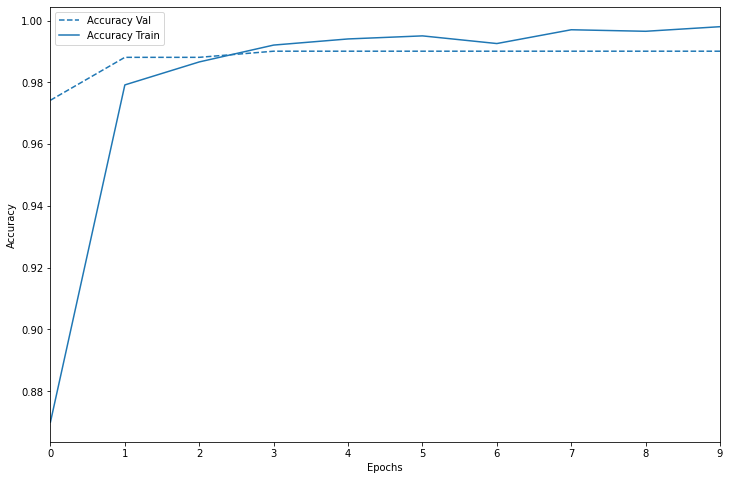

In [22]:
# Visualize model history
import matplotlib.pyplot as plt
def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))

    val = plt.plot(history.epoch, history.history['val_'+key],'--', label=key.title() +' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=key.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history(history, key='accuracy')

In [ ]:
label_to_index = validation_generator.class_indices
print(label_to_index)
index_to_label = dict((v,k) for k, v in label_to_index.items())
print(index_to_label)

{'paper': 0, 'rock': 1, 'scissor': 2}
{0: 'paper', 1: 'rock', 2: 'scissor'}


In [18]:
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  path = '/content/'+fn 
  image = load_and_preprocess_image(path)

  # reshape it to match with the trained images
  reshaped_image = tf.reshape(image, [1,224,224,3])

  # forward propagation :))
  prediction = new_model.predict(reshaped_image)

  # get the index for the highest probability
  label_to_index = tf.math.argmax(prediction[0])

  # select the label from the index
  print("The prediction is", index_to_label[label_to_index.numpy()])

Saving rock.jpg to rock (1).jpg
rock.jpg


NameError: ignored

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'sss.jpeg'
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0) # 인터넷에서 이미지 가져오면 보통 3차원인데 우리가 이미지를 제너레이터 하려면 4차원이어야 댐 (배치사이즈, 넓이, 높이, 채널) 그래서 차원 넓혀주는거
preprocessed_img = preprocess_input(expanded_img_array) # Preprocess the image
prediction = model.predict(preprocessed_img)
print(prediction)
print(validation_generator.class_indices)

[[2.4543130e-03 4.7023644e-04 9.9707544e-01]]
{'paper': 0, 'rock': 1, 'scissor': 2}
